In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [70]:
data=loadmat("ex8data1.mat")

In [71]:
X=data["X"]
Xvals=data["Xval"]
yvals=data["yval"]

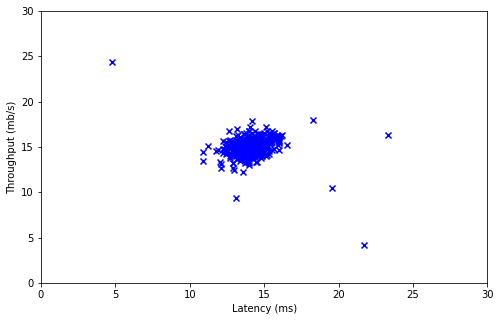

In [72]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],marker="x",c="b")
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")
plt.show()

In [73]:
def estimateGaussian(X):
    
    m = X.shape[0]
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    var = 1/m * np.sum((X - mu)**2,axis=0)
    return mu,var

In [74]:
def multivariateGaussian(X,mu,sigma2):
    k=len(mu)
    sigma2=np.diag(sigma2)
    X_new=X-mu
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X_new @ np.linalg.pinv(sigma2) * X_new,axis=1))
    return p
    

In [75]:
mu,sigma2=estimateGaussian(X)

In [76]:
p=multivariateGaussian(X,mu,sigma2)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c="b")
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T
plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape),contour_level)
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (m/s)")
plt.ylabel("Throughput (mb/s)")
plt.show()

In [77]:
def selectThreshold(yval, pval):
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1

In [78]:
pval = multivariateGaussian(Xvals, mu, sigma2)
epsilon, F1 = selectThreshold(yvals, pval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)

Best epsilon found using cross-validation: 8.990852779269495e-05
Best F1 on Cross Validation Set: 0.8750000000000001


C:\Users\14379\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


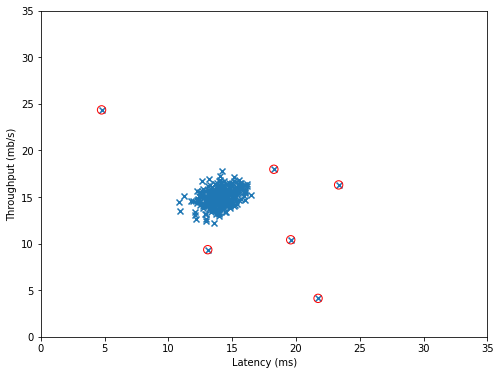

In [79]:
plt.figure(figsize=(8,6))

# plot the data
plt.scatter(X[:,0],X[:,1],marker="x")

# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker ="o",facecolor="none",edgecolor="r",s=70)

plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")
plt.show()

In [80]:
new=loadmat("ex8data2.mat")

In [81]:
X2=new["X"]
Xval2=new["Xval"]
yval2=new["yval"]

In [82]:
mu,sigma2=estimateGaussian(X2)

In [83]:
p3=multivariateGaussian(X2,mu,sigma2)
p3_val=multivariateGaussian(Xval2,mu,sigma2)

In [84]:
ep,f1=selectThreshold(yval2,p3_val)

C:\Users\14379\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


In [85]:
ep,f1

(1.3772288907613575e-18, 0.6153846153846154)

In [86]:
sum(p3<ep)

117